## Filters

Start with our usual setup, including the utility methods from last time.

In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# provide methods for loading and displaying images
def load(image_path):
    out = io.imread(image_path)
    out = out.astype(np.float64) / 255
    return out

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()
    
# As usual, you may use your own images, but you must include them in your submission.
image_path = './dog.jpg'

image = load(image_path)

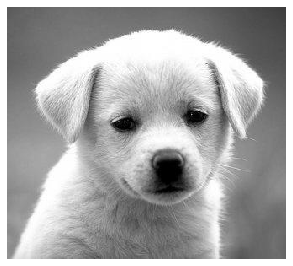

In [3]:
display(image)

We provide a naive implementation of a grayscale convolutional filter:

In [4]:
import math
def naive_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    out = np.zeros(image.shape)
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):

            output_value = 0
            
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    
                    # how far the kernel extends from current pixel
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2) 
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)
                    
                    # only apply kernel to the image and not off the edge
                    if (image_row + image_row_offset < 0 or 
                        image_row + image_row_offset >= image.shape[0] or
                        image_column + image_column_offset < 0 or 
                        image_column + image_column_offset >= image.shape[1]):
                        image_value = 0
                    else:
                        image_value = image[image_row + image_row_offset, image_column + image_column_offset]

                    # apply the kernel
                    output_value += image_value * kernel[kernel_row, kernel_column]

            out[image_row, image_column] = output_value
            
    return out

## Exercise 1

1. Take a look at the filters in the following code cell. What do you think they do? You may want to run `display()` on the filter to visualize it.
2. Run the filters using `naive_convolution_filter` to verify your answer.

In [5]:
filter1 = np.array(
[
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,1],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

filter2 = np.array(
[
    [0,0,0],
    [0,2,0],
    [0,0,0]
])

# Hint: check the lecture slides for a familiar-looking filter
filter3 = np.array(
[
    [-.11,-.11,-.11],
    [-.11,1.88,-.11],
    [-.11,-.11,-.11],
])


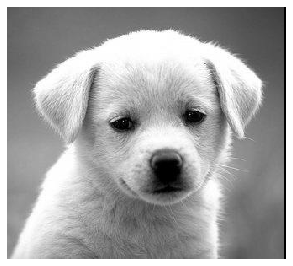

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


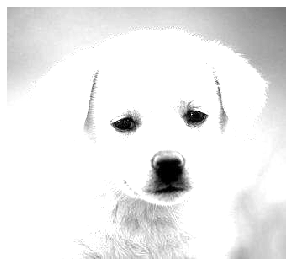

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


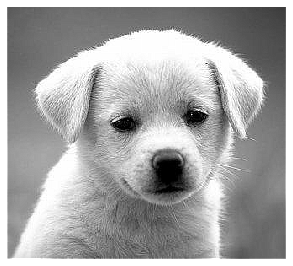

In [6]:
display(naive_convolution_filter(image, filter1))
display(naive_convolution_filter(image, filter2))
display(naive_convolution_filter(image, filter3))

## Exercise 2
So far, we've only run the naive implementation on a grayscale image. Add a color image of your choice and run a filter on it, showing both the original image and the output of the filter.

As you can see, the filter runs on all three channels. Create an implementation that allows applying different filters to each channel, and submit the output of using at least two different filters on the same image.

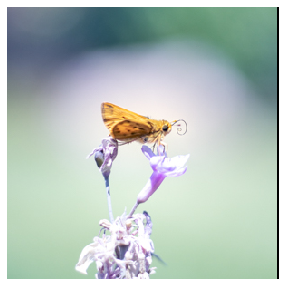

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


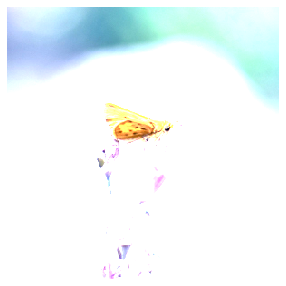

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


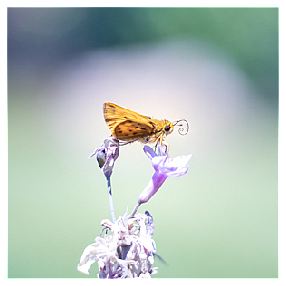

In [7]:
image_color = load("./moth.jpg")

display(naive_convolution_filter(image_color, filter1))
display(naive_convolution_filter(image_color, filter2))
display(naive_convolution_filter(image_color, filter3))

### &darr; The function I created which addresses all the excercises (except the performance one)! &darr;

In [8]:
def ncf(image, kernel, space, channel, edge_behavior="zero"):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
        space: the color space (i.e., "RGB")
        channel: the channel which the filter will be applied to (R, G, B)
        edge_behavior: "zero" or "replicate" or "mirror"
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    
    out = image.copy()
    
    if channel == space[0]:
        channel_index = 0
    elif channel == space[1]:
        channel_index = 1
    else:
        channel_index = 2
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):

            output_value = 0
            
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    
                    # how far the kernel extends from current pixel
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2) 
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)
                    
                    # only apply kernel to the image and not off the edge
                    if (image_row + image_row_offset < 0 or 
                        image_row + image_row_offset >= image.shape[0] or
                        image_column + image_column_offset < 0 or 
                        image_column + image_column_offset >= image.shape[1]):

                        # edge behavior
                        if edge_behavior == "zero":
                            image_value = 0
                        
                        # replicate edge
                        elif edge_behavior == "replicate":
                            if image_row + image_row_offset < 0:
                                image_value = image[0][image_column][channel_index]
                            
                            if image_row + image_row_offset >= image.shape[0]:
                                image_value = image[image.shape[0]-1][image_column][channel_index]
                            
                            if image_column + image_column_offset < 0:
                                image_value = image[image_row][0][channel_index]
                            
                            if image_column + image_column_offset >= image.shape[1]:
                                image_value = image[image_row][image.shape[1]-1][channel_index]
                        
                        # mirror edge
                        elif edge_behavior == "mirror":
                            if image_row + image_row_offset < 0:
                                off_edge = 0 - (image_row + image_row_offset)
                                image_value = image[off_edge][image_column][channel_index]
                            
                            if image_row + image_row_offset >= image.shape[0]:
                                off_edge = image.shape[0] - ((image_row + image_row_offset) - image.shape[0])
                                image_value = image[off_edge][image_column][channel_index]
                            
                            if image_column + image_column_offset < 0:
                                off_edge = 0 - (image_column + image_column_offset)
                                image_value = image[image_row][off_edge][channel_index]
                            
                            if image_column + image_column_offset >= image.shape[1]:
                                off_edge = image.shape[1] - ((image_column + image_column_offset) - image.shape[1])
                                image_value = image[image_row][off_edge][channel_index]
                            
                    else:

                        image_value = image[image_row + image_row_offset, image_column + image_column_offset, channel_index]

                    # apply the kernel
                    output_value += image_value * kernel[kernel_row, kernel_column]

            out[image_row, image_column, channel_index] = output_value
            
    return out


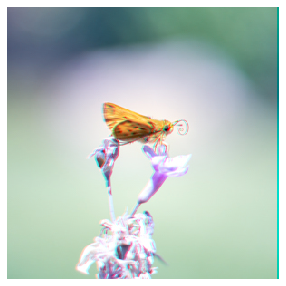

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


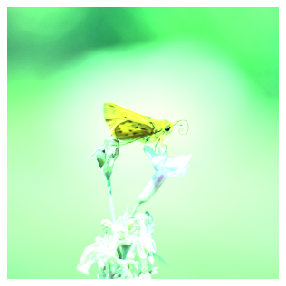

In [9]:
display(ncf(image_color, filter1, "RGB", "R"))
display(ncf(image_color, filter2, "RGB", "G"))

## Exercise 3
Create your own filter(s) and describe their output.

In [10]:
filter_hls1 = np.array(
[
    [0.04,0.04,0.04,0.04,0.04],
    [0.04,0.04,0.04,0.04,0.04],
    [0.04,0.04,0.04,0.04,0.04],
    [0.04,0.04,0.04,0.04,0.04],
    [0.04,0.04,0.04,0.04,0.04],
])

filter_hls2 = np.array(
[
    [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
    [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
    [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
    [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
    [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
    [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
    [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
])

Function to convert between HLS (hue, luminance, saturation) color space so I can apply filters to those attributes.

In [11]:
import colorsys

def rgb2hls(image):
    out = image.copy()
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
#             print(out[r][c])
            out[r][c] = colorsys.rgb_to_hls(image[r][c][0], image[r][c][1], image[r][c][2])
#             print(colorsys.rgb_to_hls(image[r][c][0], image[r][c][1], image[r][c][2]))
#             print(out[r][c])
    return out

def hls2rgb(image):
    out = image.copy()
    for r in range(image.shape[0]):
        for c in range(image.shape[1]):
#             print(out[r][c])
            out[r][c] = colorsys.hls_to_rgb(image[r][c][0], image[r][c][1], image[r][c][2])
#             print(colorsys.rgb_to_hls(image[r][c][0], image[r][c][1], image[r][c][2]))
#             print(out[r][c])
    return out

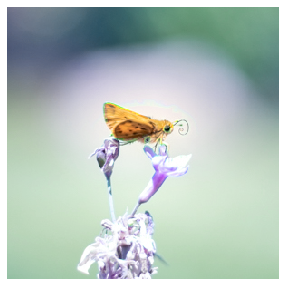

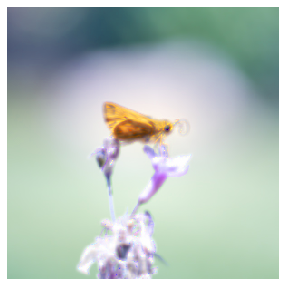

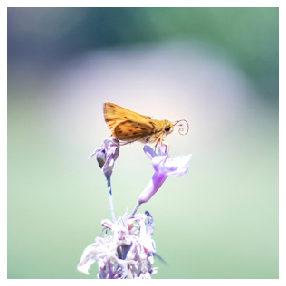

In [12]:
image_hls = rgb2hls(image_color)
display(hls2rgb(ncf(image_hls, filter_hls1, "HSL", "H", "replicate")))
display(hls2rgb(ncf(image_hls, filter_hls1, "HSL", "S", "replicate")))
display(hls2rgb(ncf(image_hls, filter_hls1, "HSL", "L", "replicate")))

## Advanced exercise 1

Recall from lecture that at the edges, filters only partially overlap with the image pixels, so we need a way to provide numbers that are out of bounds. The provided implementation uses the strategy we discussed in lecture, zero-padding, which just treats all out-of-bounds pixels as zero.

A different strategy is edge value replication: treat all out-of-bounds pixels as having the same value as the closest in-bounds pixel. Another one is mirror extension: treat the border of the image as a mirror, and use the pixel value that would be reflected into the out-of-bounds space. These are not the only strategies -- you're welcome to research others on your own.

Modify naive_convolutional_filter to implement one or more of these strategies. How does that change the output of filters?

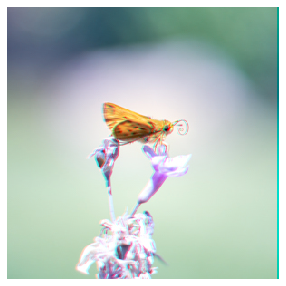

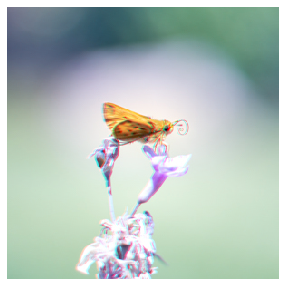

IndexError: index 300 is out of bounds for axis 0 with size 300

In [13]:
display(ncf(image_color, filter1, "RGB", "R", "zero"))
display(ncf(image_color, filter1, "RGB", "R", "replicate"))
display(ncf(image_color, filter1, "RGB", "R", "mirror"))

In [ ]:
image_gradient = load("./gradient.png")

display(ncf(image_gradient, filter1, "RGB", "R", "zero"))
display(ncf(image_gradient, filter1, "RGB", "R", "replicate"))
display(ncf(image_gradient, filter1, "RGB", "R", "mirror"))

**Answer:**

See `ncf()` function above for code.

slkdjflsdkfjsdklsfkj

## Advanced exercise 2

You may have noticed that `naive_convolutional_filter` is quite slow. Create an implementation that is faster, using the `time` library to demonstrate the difference in performance. Your implementation must return the same output as the naive implementation.


In [8]:
def ncf(image, kernel, space, channel, edge_behavior="zero"):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
        space: the color space (i.e., "RGB")
        channel: the channel which the filter will be applied to (R, G, B)
        edge_behavior: "zero" or "replicate" or "mirror"
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    
    out = image.copy()
    
    if channel == space[0]:
        channel_index = 0
    elif channel == space[1]:
        channel_index = 1
    else:
        channel_index = 2
        
    image = np.asarray(image)
    kernel = np.asarray(kernel)
    
    for image_row in range(image.shape[0]):
        for image_column in range(image.shape[1]):
            
            image_slice = image[image_row:min(image.shape[0]-1, image_row+kernel.shape[0]), image_column:min(image_column.shape[1]-1, image_column+kernel.shape[1])]
            
            sliceXkernel = image_slice * kernel
            
            output_value = np.sum(sliceXkernel)
            
            out[image_row, image_column, channel_index] = output_value
            
    return out
